1. Data preprocessing (missing values)
2. Exploratory data analysis (extract meaningful insights)
3. Feature engineering
4. Model selection (ML algorithms - logistic regression, decision trees, random forests, gradient boosting will be explored and evaluated to determine most effective model for predicting outcomes)
5. Evaluation

## Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [2]:
df.shape  # Check the shape of the DataFrame (rows, columns)

(891, 12)

In [3]:
# Removing unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes  # Check the data types of each column

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [6]:
# Checking for unique value count
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [7]:
# Checking for missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

## Data Cleaning

In [8]:
# Data Cleaning : Replacing missing valus with median for age (Right skewed due to outliers)
df['Age'] = df['Age'].replace(np.nan,df['Age'].median(axis=0))

# Data Cleaning : Replacing missing values with mode for Embarked
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

# Typecasting age to int
df['Age'] = df['Age'].astype(int)

# Replacing 1 for male and 0 for females
df['Sex'] = df['Sex'].apply(lambda x:1 if x == 'male' else 0)

In [9]:
# Categorising age in groups
# Infant (0-5), Child (6-20), 20s (21-30), 30s(31-40), 40s (41-50), 50s (51-60), Senior (61-100)

df['Age'] = pd.cut(x=df['Age'], 
                   bins=[-1, 5, 20, 30, 40, 50, 60, 100], 
                   labels = ['Infant', 'Child', '20', '30', '40', '50', 'Senior'],
                   right = True,
                   include_lowest=True)

In [10]:
df.tail(20)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
871,0,1,0,Infant,1,2,151.5500,S
872,1,2,1,Infant,1,1,26.0000,S
873,1,3,0,Infant,0,1,12.2875,S
874,1,2,0,Infant,1,1,26.0000,S
875,0,3,0,Infant,3,2,27.9000,S
876,0,3,1,Infant,4,1,39.6875,S
877,0,3,1,Infant,4,1,39.6875,S
878,1,3,0,Infant,1,1,11.1333,S
879,1,2,1,Infant,2,1,39.0000,S
880,1,3,0,Infant,0,2,15.7417,C


In [11]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,1,2,1,Infant,1,1,18.7500,S
887,1,3,0,Infant,2,1,19.2583,C
888,1,3,0,Infant,2,1,19.2583,C
889,1,2,1,Infant,1,1,14.5000,S
890,1,3,1,Infant,0,1,8.5167,C


# Exploratory Data Analysis
## Plotting the countplot to visualize the numbers

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_16294/2506207595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, ax=ax[0, 0], palette='Set2')
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_16294/2506207595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, ax=ax[0, 1], palette='Set2')
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_16294/2506207595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, ax=ax[0, 2], palette='Set2')
/var/fol

<Axes: xlabel='Parch', ylabel='count'>

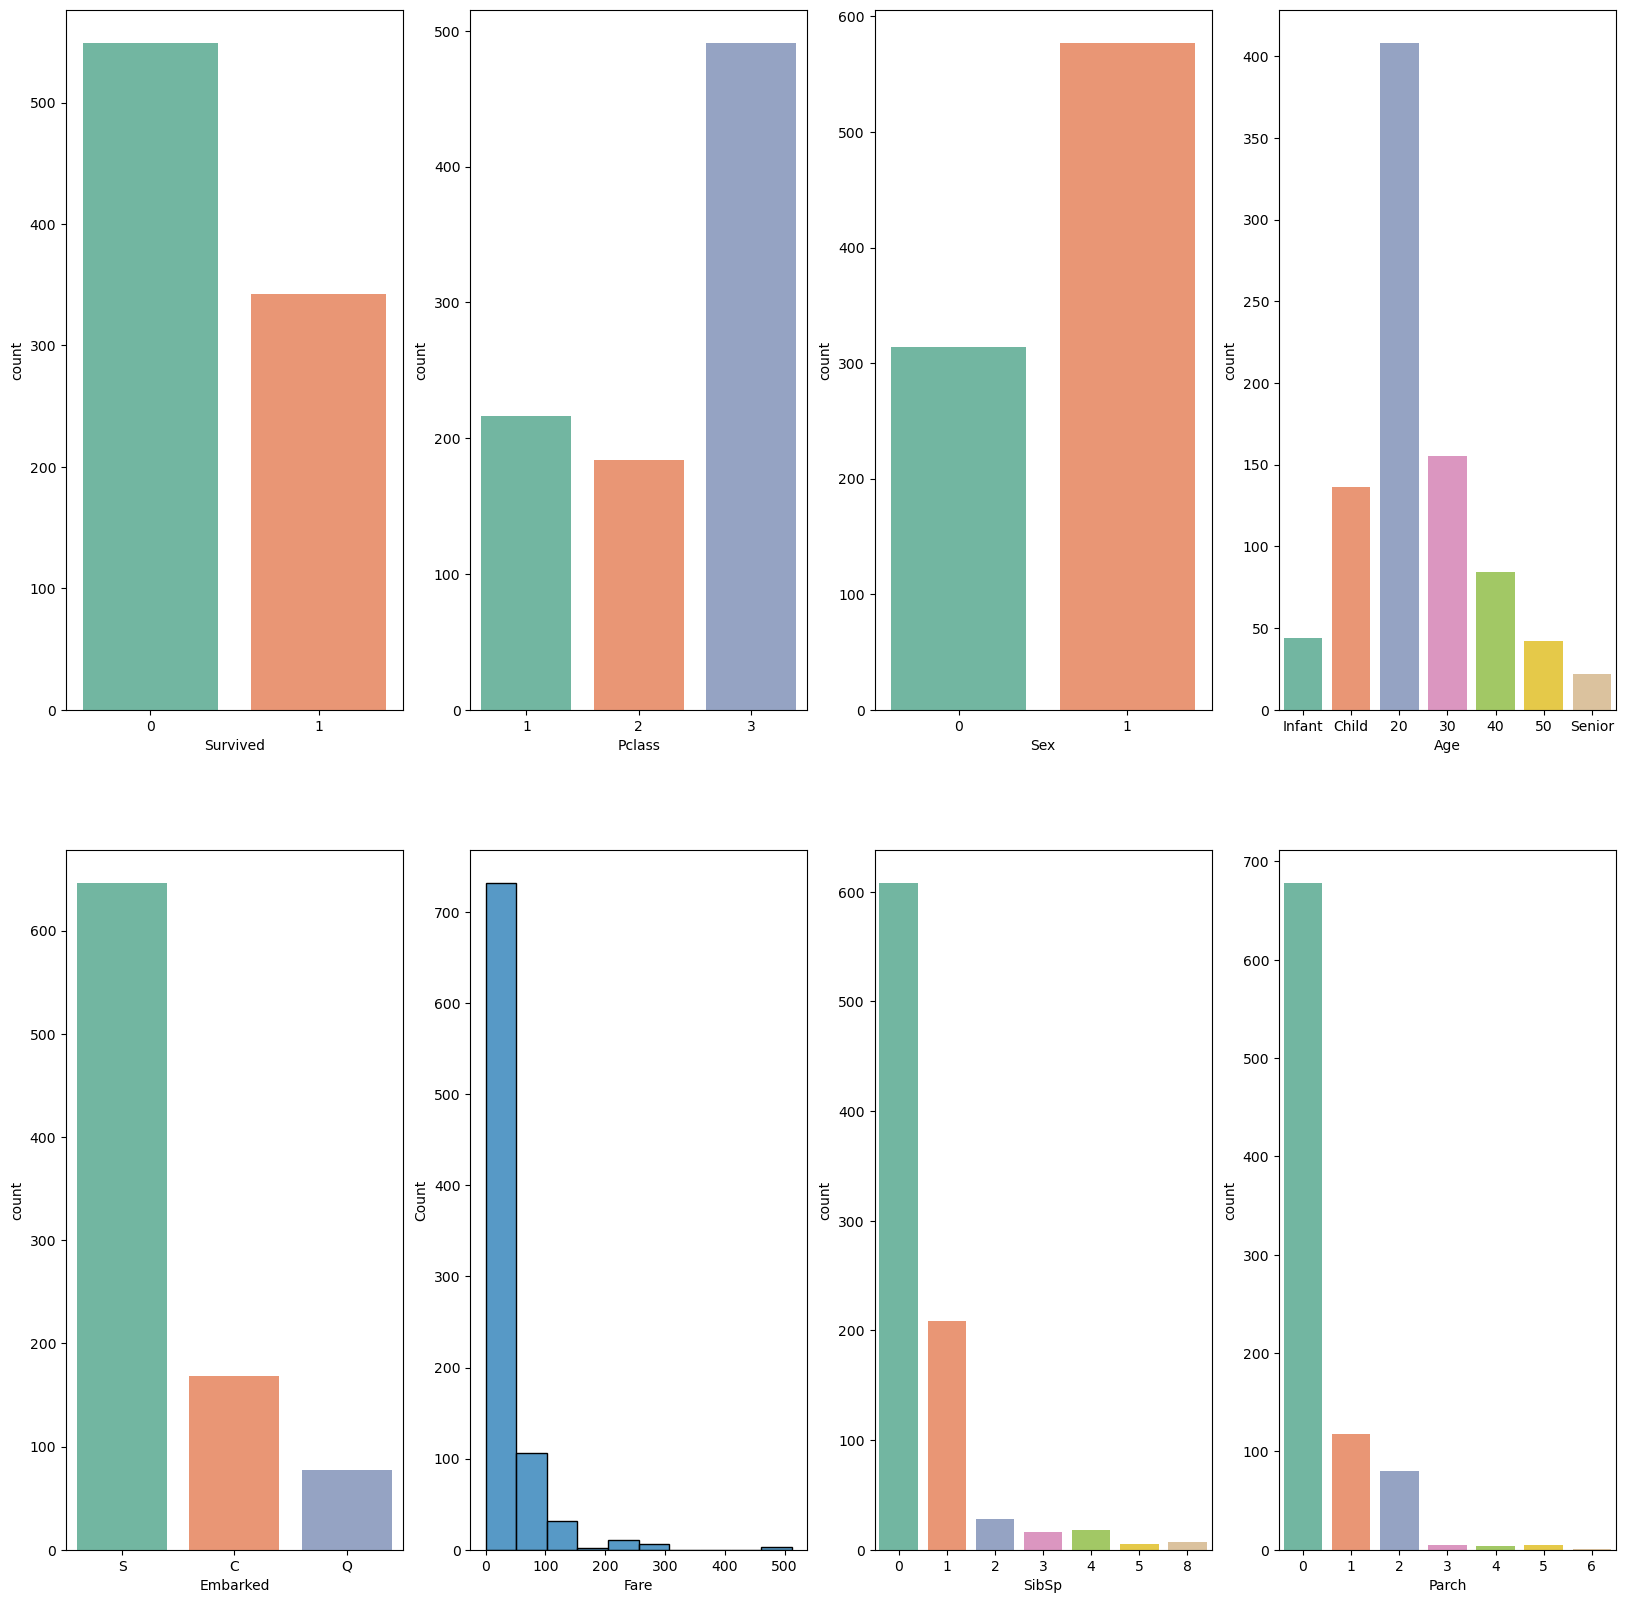

In [12]:
# Plotting the cleaned data (count vs each catgegory)
fig, ax = plt.subplots(2, 4, figsize=(20, 20))
sns.countplot(x='Survived', data=df, ax=ax[0, 0], palette='Set2')
sns.countplot(x='Pclass', data=df, ax=ax[0, 1], palette='Set2')
sns.countplot(x='Sex', data=df, ax=ax[0, 2], palette='Set2')
sns.countplot(x='Age', data=df, ax=ax[0, 3],palette='Set2')
sns.countplot(x='Embarked', data=df, ax=ax[1, 0],palette= 'Set2')
sns.histplot(x='Fare', data=df,bins = 10, ax=ax[1, 1], palette='Set2')
sns.countplot(x='SibSp', data=df, ax=ax[1, 2], palette='Set2')
sns.countplot(x='Parch', data=df, ax=ax[1, 3], palette='Set2')

# Parch means number of parents/children aboard
# Sibsp means number of siblings/spouses aboard
# Colors here have no significance, just for visualization, across diff groups

## Visualizing the relationship between the features

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_16294/1497080572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Pclass', y = 'Survived', data=df, ax=ax[1, 0], palette='Set2')
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_16294/1497080572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y = 'Fare', data=df, ax=ax[1, 1], palette='Set1')


<Axes: xlabel='SibSp', ylabel='Parch'>

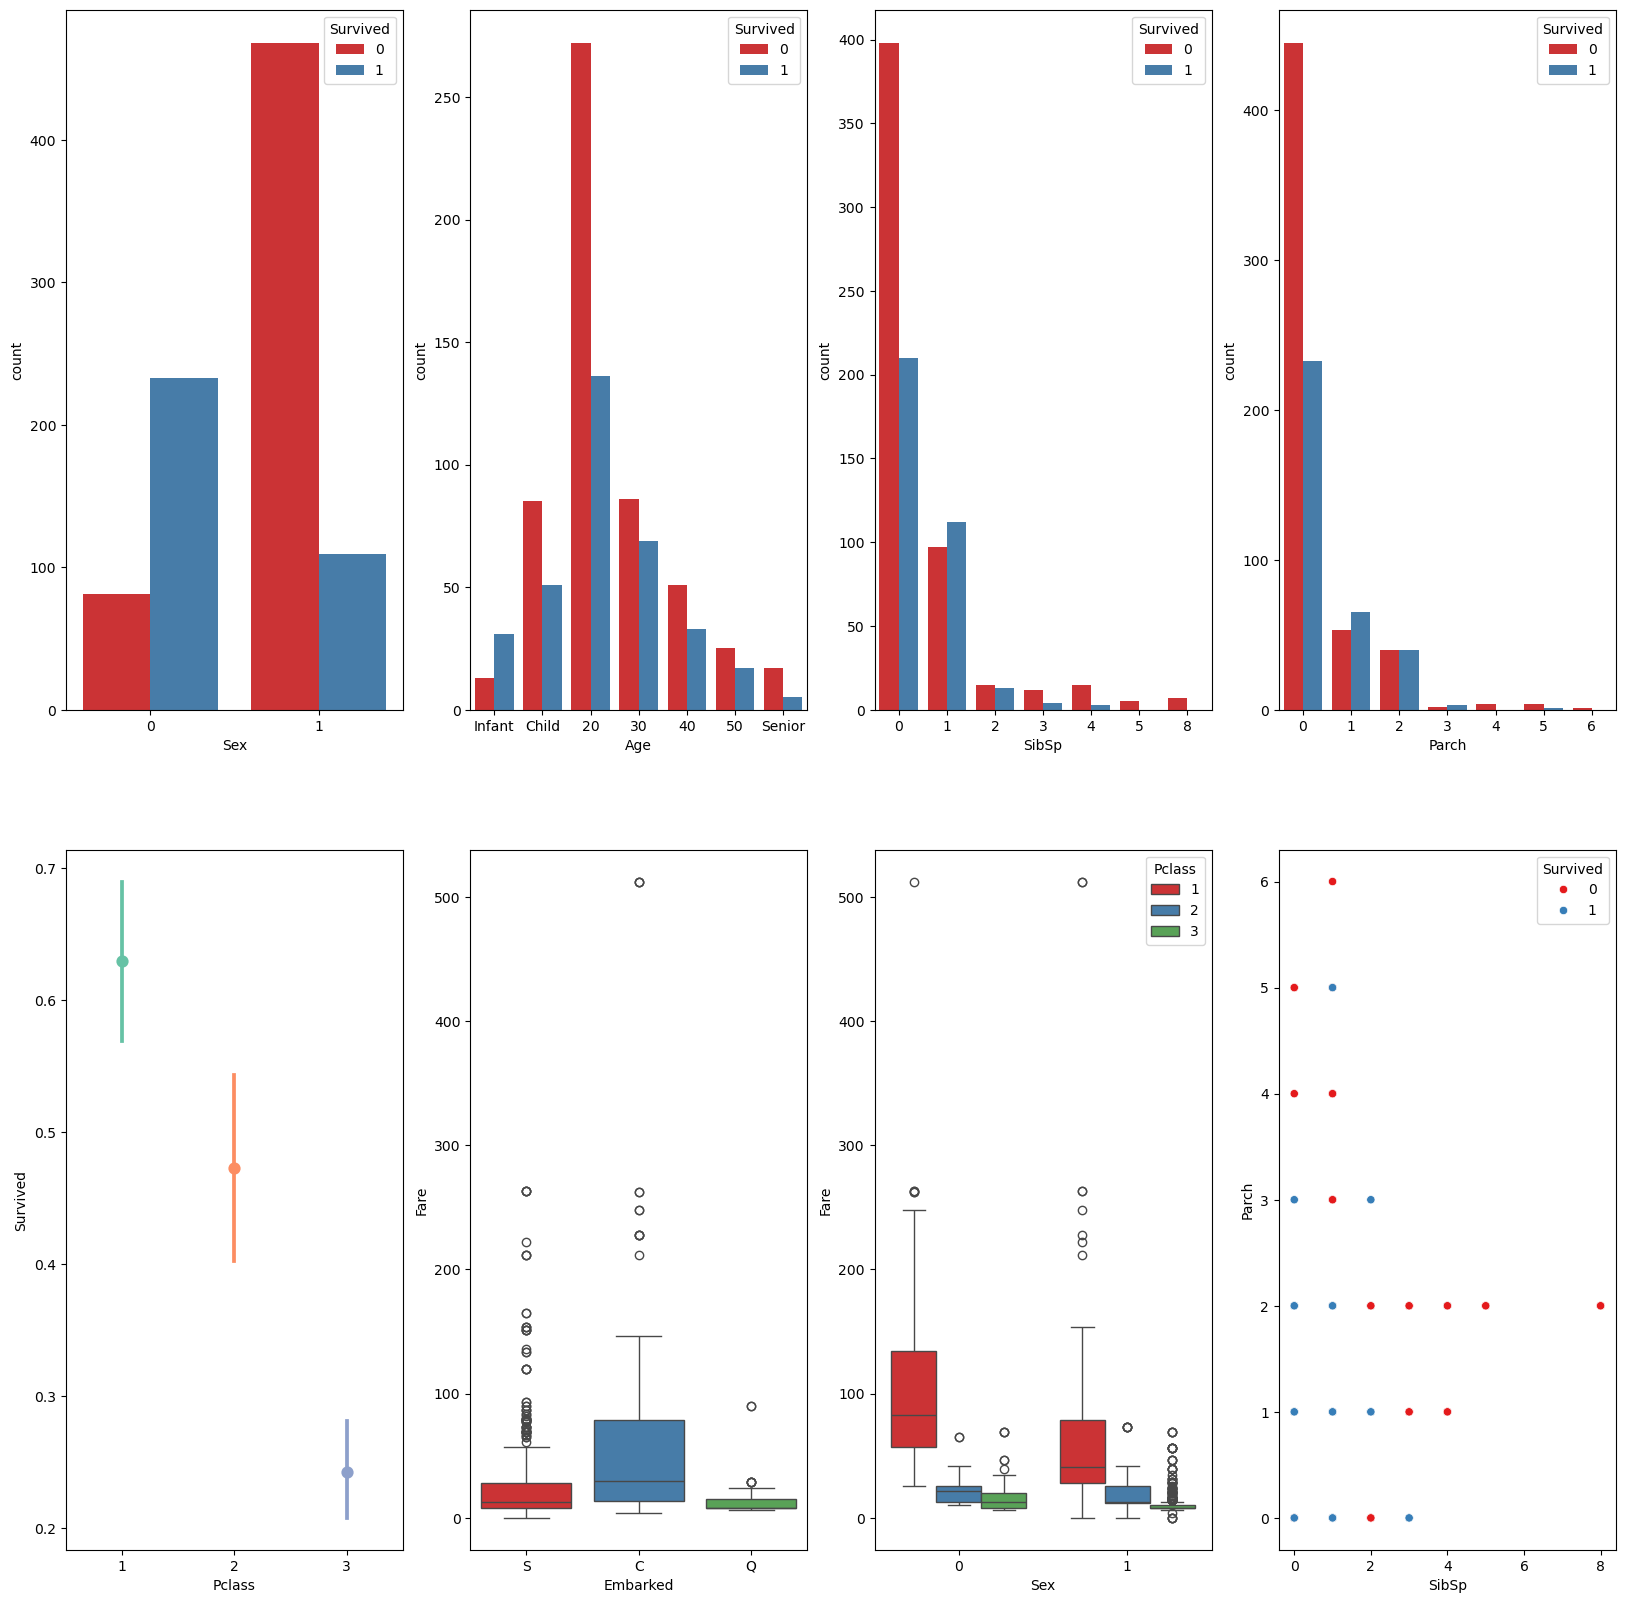

In [13]:
# Survived is 1, Dead is 0
# We want to see how does survival rate vary with sex, age, sibsp, parch, fare, pclass, embarked
fig,ax = plt.subplots(2,4,figsize=(20, 20))
sns.countplot(x='Sex', data=df, hue='Survived', ax=ax[0, 0], palette='Set1')
sns.countplot(x='Age', data=df, hue='Survived', ax=ax[0, 1], palette='Set1')
sns.countplot(x='SibSp', data=df, hue='Survived', ax=ax[0, 2], palette='Set1')  
sns.countplot(x='Parch', data=df, hue='Survived', ax=ax[0, 3], palette='Set1')  
sns.pointplot(x='Pclass', y = 'Survived', data=df, ax=ax[1, 0], palette='Set2')  
sns.boxplot(x='Embarked', y = 'Fare', data=df, ax=ax[1, 1], palette='Set1')
sns.boxplot(x='Sex', y = 'Fare', hue = 'Pclass', data=df, ax=ax[1, 2], palette='Set1')
sns.scatterplot(x='SibSp', y='Parch', data=df, hue='Survived', ax=ax[1, 3], palette='Set1')



# Data preprocessing 
### How are is survival rate correlated to each variables? 
### Are the relationships statistically significant?


In [14]:
from sklearn import preprocessing
# Label encoder converts categorical labels into numbers
le = preprocessing.LabelEncoder()
le.fit(['S', 'C', 'Q']) # [0,1,2]
df['Embarked'] = le.transform(df['Embarked'])
#le.transform.. takes Embarked column and replaces it.
# S = 0, C = 1, Q = 2

# Why do this? ML algorithms work with numbers, not strings.
# Label encoding is a way to convert categorical text data into numerical data.

In [15]:
age_mapping = {
    'Infant': 0,
    'Child': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'Senior': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis = 0, inplace=True)  # Drop rows where Age is NaN after mapping

# We are using age_mapping dictionary to convert age categories into numerical values.
# Using exact ages can cause the model to fit too closely to small variations in age, leading to overfitting.
# Deleting passengers without age data as they are not useful for our analysis.
# Avoids potential bias from imputation (e.g., filling with mean/median) which could skew results and hurt model accuracy.

## Correlation Heatmap

<Axes: >

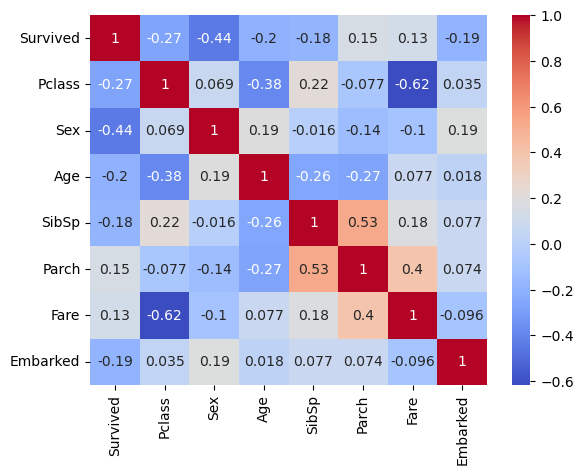

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Correlation Heatmap shows the strength and direction of the relationship 
# between 2 features, at a time.

# To see 3-variable relationships, we can use sns.pairplot (color + size + axis)
# Or multivariate 

## Logistic Regression 
- Testing for statistical significance with p-values.
- If p < 0.05, the variable is statistically significant in predicting/affecting survival rates.
- LR estimates the independent effect of each variable while controlling for others.
- Good for multivariate analysis (when survival rate is affected by sex, age, etc tgt at a time)

- Simple stats test (chi sq, t-test, mann whitney, anova) tests the rship for 2 variables at a time :(
- Doesn't account for other factors that might influence the rship.

In [17]:
# Logistics Regression Significance Testing (p-values)
# We can use statsmodels to perform logistic regression and get p-values for each feature.
import statsmodels.api as sm

X = df[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']]  # example features
X = sm.add_constant(X)  # intercept
y = df['Survived']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.454583
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  202
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            7
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.3349
Time:                        08:19:45   Log-Likelihood:                -91.826
converged:                       True   LL-Null:                       -138.07
Covariance Type:            nonrobust   LLR p-value:                 3.815e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6800      1.393      4.796      0.000       3.950       9.410
Age           -0.5373      0.

# Explanation of Results 
## Are the variables relationship with survival rates statistically significant?

Logistic regression
- Multivariate model
- Controls for other predictors in the model
- Different coefficient values than corelation heatmap
- "How much does this variable affect survival when all other variables are considered too?"

Correlation heatmap
- Does not control for other variables
- Shows pairwise correlation
- Quick way to determine if there is a linear rship. 
- "How much does this variable affect survival, on its own?"

### The strength of relationship is in order, beginning with sex being the strongest.

1. Sex
- Most significant predictor. Highest negative coef.
- Survival rates increase for females. Males less likely to survive.

2. PClass
- Significant predictor (-ve coeff)
- Survival rate is higher for lower classes (1 = first class, 2=2nd, 3 = 3rd class)

3. Age
- Significant predictor. (-ve coeff)
- Older passengers less likely to survive.

4. SibSp
- Significant predictor. 
- More siblings

Fare, Parch, Embarked
- Not statisically significant. Fare doesn't strongly predict survival
- p>0.05 (p>|z|)

Const 
- Intercept term. 
- Baseline log-odds of survival when others = 0 (die)

### Things to note

- Non robust covariance means SE are calculated with usual assumptions (homoscedasticity - constant variance of errors)
- If data is not independent, one person's survival affects another, then the usual logistic regression assumptions are violated, affecting reliability of SE, CI, p-value inferences.
- Could lead to correlation between residuals, underestimated SE, p-values too optimistic (false positive)
- How then to handle dependent data? 
- Cluster by group to adjust for SE, accounting for within group correlation.
- Identify clusters by family ID. 
- But this is impossible to do with our data. We do not know for sure who were travelling as a group. 

- Another factor : multicollinearity
- When 2 or more predictor variables in a regression model are highly correlated with each other.
- It makes it hard to separate out the indiv effect of each predictor on the response variable
- Regression coefficients become unstable and SE get inflated.
- This leads to large changes in coefficients, if u change ur data
- Insignificant p-values 
- To detect multicollinearity, calculate coorelation matrix for predictors
- Use Variance Inflation Factor (> 5 or 10 indicates problematic multicollinearity)

- To fix MC, collect more data, remove or combine correlated predictors, use dimensionality reduction methods (PCA), regularization mtds (Ridge regression)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume X is your dataframe of predictors
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    feature        VIF
0     const  39.925694
1       Age   1.378914
2      Fare   2.169132
3    Pclass   2.295560
4       Sex   1.115726
5  Embarked   1.076454
6     SibSp   1.618036
7     Parch   1.725051


### Explanation of VIF results
- VIF for const (intercept) is high but that's normal and usually ignored
- VIFs are low for other predictors (~1)
- No serious multicollinearity issues amongst predictors
- Variables are not strongly correlated with each other :)
- Regression coefficientsand p-values are unlikely to be distorted due to multicollinearity.

### Sklearn is for prediction with Machine Learning.
### Stats model is for viewing if rship is statistically significant.

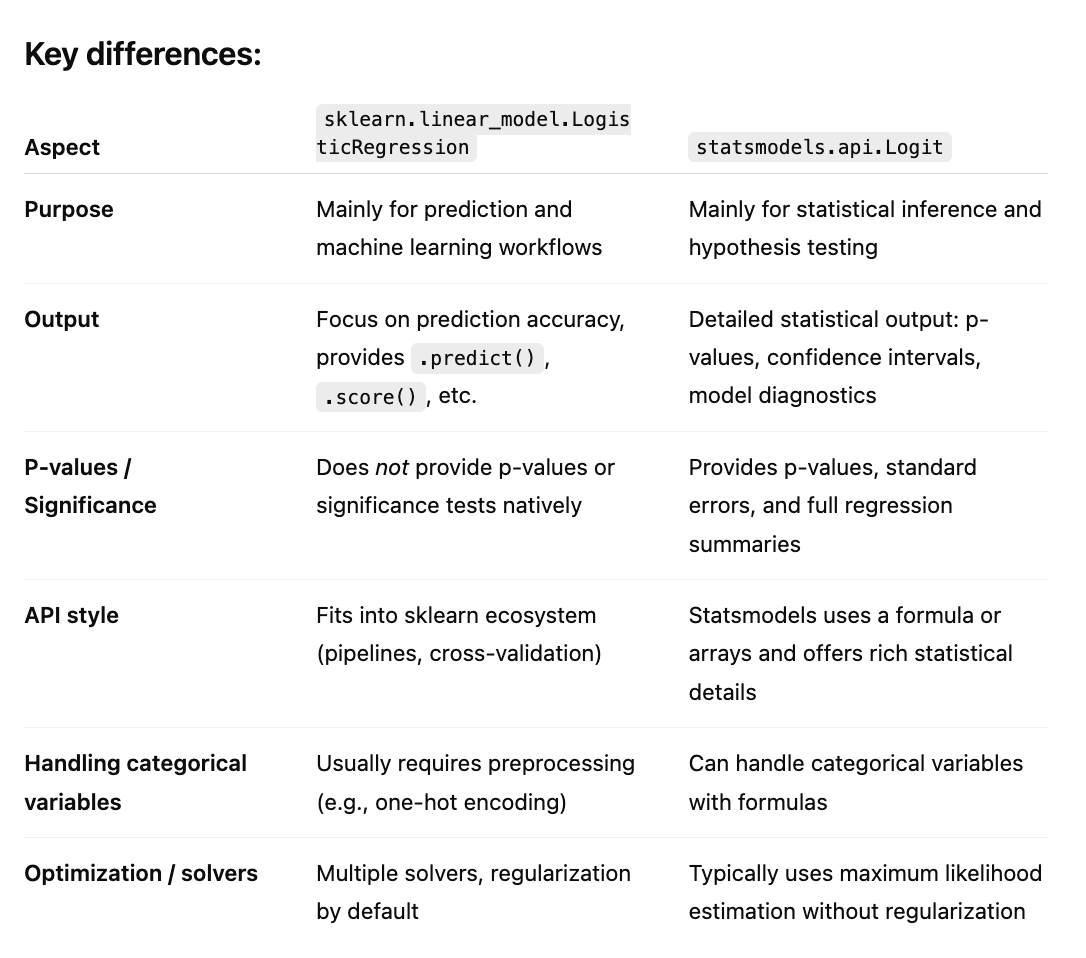

# Machine Learning - Model Training
## Separating the target and independent variable
1. To test for statistical significance between survival rates and other variables.
2. Model Training for prediction.

In [19]:
y = df['Survived']
x = df.drop(columns=['Survived'])

## 1. Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=150)  # Increased max_iter for convergence
lr
# LR is not fitted yet. We have created the model, but not trained it yet 
# (to fit on any data).
# In scikit-learn, we first create the model, then fit it to the data.
# Then, we can use model to predict outcomes.
# Fitting the model learns the rship between X and Y.

LogisticRegression(max_iter=150)

In [21]:
lr.fit(x,y)
lr.score(x,y)

# Predictions by this model is 80.54% accurate.

0.801980198019802

## 2. Decision Tree Classifier

In [22]:
# The model has learned the relationship between the features (x) and the target variable (y).
# Decision Tree Classifier is a supervised learning algorithm used for classification tasks.
# It builds a model in the form of a tree structure, where each internal node represents a feature 
# (or attribute), each branch represents a decision rule, 
# and each leaf node represents an outcome (class label).
# The model is trained by splitting the data into subsets based on the feature values,
# and it continues to split until a stopping criterion is met 
# (e.g., maximum depth of the tree, minimum number of samples in a leaf node, etc.).
# The goal is to create a model that predicts the target variable (in this case, survival) 
# based on the input features (like age, fare, class)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [23]:
dtree.fit(x,y)
dtree.score(x,y)
# The Decision Tree Classifier has been trained on the data and is now ready to make predictions.
# The score indicates the accuracy of the model on the training data.
# The model has learned the relationships between the features and the target variable.
# The score is the proportion of correct predictions made by the model on the training data.
# A higher score indicates better performance, but it is important to evaluate the model on unseen data
# to ensure it generalizes well.
# The model has learned the relationships between the features and the target variable.
# The score is the proportion of correct predictions made by the model on the training data.
# A higher score indicates better performance, but it is important to evaluate the model on unseen data
# to ensure it generalizes well.        

0.9653465346534653

## 3. Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [25]:
svm.fit(x,y)
svm.score(x,y)
# The Support Vector Machine (SVM) model has been trained on the data and is now ready to make predictions.
# The score indicates the accuracy of the model on the training data.

0.6138613861386139

## 4. K-Nearest Neighbour (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [27]:
knn.fit(x, y)
knn.score(x, y)

0.8267326732673267

# Conclusions = Decision Tree Classifier
From the above four models, Decision Tree Classifier has the highest training accuracy.

So only Decision Tree Classifier will work on the test set

# Importing the test set 

In [28]:
df2 = pd.read_csv('titanic_test.csv')
df2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning the Test Set

In [29]:
# Removing unnecessary columns from the test set
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
# Replacing missing values in the test set with MEDIAN.
df2['Age'] = df2['Age'].replace(np.nan, df2['Age'].median(axis=0))
df2['Embarked'] = df2['Embarked'].replace(np.nan, 'S')

In [31]:
# Typecasting age to int
df2['Age'] = df2['Age'].astype(int)

In [32]:
# Replacing 1 for male and 0 for female
df2['Sex'] = df2['Sex'].apply(lambda x: 1 if x == 'male' else 0)


In [33]:
## Categorising age in groups
df2['Age'] = pd.cut(x=df2['Age'],
                     bins=[0, 5, 20, 30, 40, 50, 60, 100], labels=['0', '1', '2', '3', '4', '5', '6'])    


In [34]:
le.fit(['S','C','Q'])
df2['Embarked'] = le.transform(df2['Embarked'])
# ML algo can only work with numbers, not strings.

In [35]:
# Removing all NA values.
df2.dropna(subset=['Age'], axis = 0, inplace = True)

In [36]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,2
1,1,1,0,3,1,0,71.2833,0
2,1,3,0,2,0,0,7.9250,2
3,1,1,0,3,1,0,53.1000,2
4,0,3,1,3,0,0,8.0500,2


## Separating the target and independent variable

In [37]:
x = df2.drop(columns = ['Survived'])
y = df2['Survived']

# Predicting using Decision Tree Classifier

In [38]:
tree_pred = dtree.predict(x)

from sklearn.metrics import accuracy_score
accuracy_score(y,tree_pred)

0.8190045248868778

### Confusion Matrix

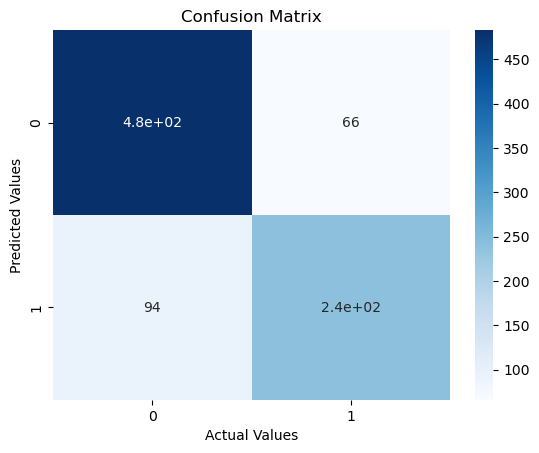

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred), annot = True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# Confusion matrix is a performance measurement tool for classicification models like decision trees.
# Shows how well the model's prediction match the actual label.

## Conclusions of Model Predictions

Accuracy score = 82%

- ✅ 480 people who actually died were correctly predicted (True Negative)
- ✅ 240 people who actually survived were correctly predicted (True Positive)
- ❌ 66 people who actually survived were wrongly predicted as dead (False Negative)
- ❌ 93 people who actually died were wrongly predicted as alive (False Positive)